In [6]:
# Bernstein - vazirani algorithm
# suppose you have a secret number hidden inside a box and that number is described as 6 bits so to determine that
# number. A classical computer requires 6 attempts but a quantum computer with the help of Bernstein algorithm we can find it in 1 attempt
# irrespective of its size

In [14]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [15]:
secret_number = '101010'

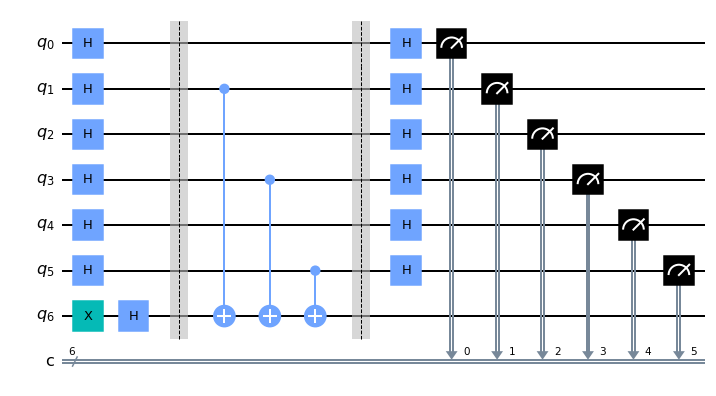

In [16]:
circuit = QuantumCircuit(len(secret_number)+1,len(secret_number))
#circuit.h([0,1,2,3,4,5])

circuit.h(range(len(secret_number)))

circuit.x(6)
circuit.h(6)

circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()

#circuit.h([0,1,2,3,4,5])

circuit.h(range(len(secret_number)))

circuit.measure(range(len(secret_number)), range(len(secret_number)))


#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.draw(output='mpl')

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101010': 1}
